In [1]:
## Digits

In [2]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from gympy.layers import Linear, Relu, Sigmoid, Softmax, Tanh
from gympy.networks import NeuralNetwork, DataSet
from gympy.optimizers import Adam
from gympy.loss import CategoricalCrossEntropy
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
digits = load_digits()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)
X_train.shape

(1347, 64)

In [5]:
Y = OneHotEncoder(sparse=False).fit_transform(y_train.reshape(-1,1)).T
Y.shape

(10, 1347)

In [6]:
X = StandardScaler().fit_transform(X_train).T
print(X.shape)


(64, 1347)


In [7]:

n_iter=390
model = NeuralNetwork(
    layers = [
        Tanh(n_input=64, n_output=32, dropout_rate=0.0),
        Softmax(n_input=32, n_output=10)
    ],
    optimizer = Adam(learning_rate=1e-3, beta1=0.9, beta2=0.999),
    loss = CategoricalCrossEntropy(),
    n_iter=n_iter
)

In [8]:
tt = model.forward(X[:,0:1])
tt

array([[0.10143399],
       [0.10085561],
       [0.09927378],
       [0.10015425],
       [0.10051942],
       [0.09833226],
       [0.10125156],
       [0.09814287],
       [0.10058796],
       [0.0994483 ]])

In [9]:
yy = Y[:,0:1]
yy

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [10]:
np.log(0.5)

-0.6931471805599453

In [11]:
CategoricalCrossEntropy().forward(tt, Y[:,0:1])

2.3213310474673476

In [12]:

dataset = DataSet(
    x = X,
    y = Y,
    batch_size=64
)


In [13]:
for i in model.get_bias():
    print(i.shape)

(32, 1)
(10, 1)


[[ 0.         -0.00099976  0.00099987 ... -0.00099998 -0.00099998
  -0.00099988]
 [ 0.         -0.00099991 -0.00099997 ... -0.00099993 -0.00099995
  -0.00099959]
 [ 0.         -0.00099996 -0.00099997 ...  0.00099985 -0.00099995
  -0.00099965]
 ...
 [ 0.          0.00099998  0.00099999 ... -0.00099968  0.00099991
   0.00099974]
 [ 0.          0.00099986 -0.00099992 ...  0.00099982  0.0009998
   0.0009998 ]
 [ 0.          0.0009998  -0.00099993 ...  0.00099996  0.00099814
  -0.00099954]]
[[ 0.00099996  0.00099999 -0.00099998 -0.00099996  0.00099997  0.00099998
  -0.00099999  0.00099982  0.00099999  0.00099996 -0.00099998 -0.00099951
  -0.000994    0.00099979  0.00099998  0.00099998  0.00099998 -0.00099984
  -0.00099995  0.00099998 -0.00099915 -0.00099963  0.0009995  -0.00099998
   0.00099998  0.00099993 -0.00099996 -0.00099989  0.00099998  0.00099997
  -0.00099992  0.00099998]
 [ 0.00099996 -0.00099998 -0.00099997 -0.00099982 -0.00099989 -0.00099997
  -0.00099993  0.00099998 -0.00099815 

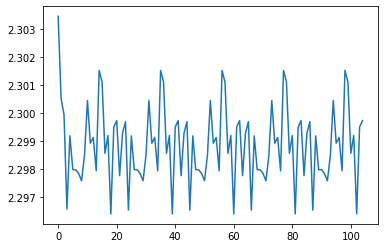

In [14]:
n_iter=5000
model.train_dataset(dataset, show=1, n_epochs=5)
plt.plot(model.cost)

In [15]:
model.forward(X[:,[453]])

array([[0.09986159],
       [0.09904357],
       [0.09945635],
       [0.10064403],
       [0.10016371],
       [0.09977907],
       [0.10067746],
       [0.09959468],
       [0.10146986],
       [0.09930969]])

In [16]:
test_idx = np.random.choice(X.shape[1],16, replace=False)

In [17]:
prob = model.forward(X[:,test_idx])
pred = np.argmax(prob,axis=0)

true_vals = np.argmax(Y[:,test_idx], axis=0)

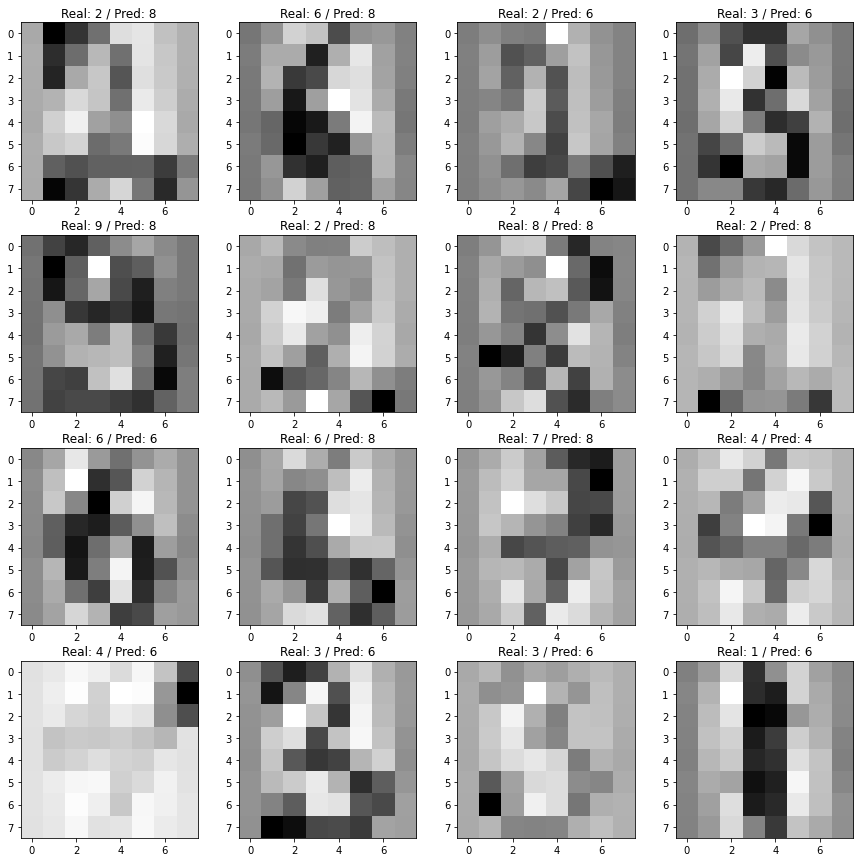

In [18]:
fig, axes = plt.subplots(4,4, figsize=(15,15))

for i,(idx, ax) in enumerate(zip(test_idx, axes.flatten())):
    ax.imshow(X[:,idx].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Real: {true_vals[i]} / Pred: {pred[i]}')